<h1> one Variable </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('house.csv')
one_var_data=data

In [3]:
one_var_data

,size,bedroom,price
0,3391,4,91573
1,3844,3,88424
2,3965,1,95163
3,3494,5,104835
4,1913,1,38264
...,...,...,...
94,3178,2,47678
95,2229,3,55734
96,3453,1,34534
97,2972,4,74316


In [4]:
X=one_var_data.iloc[:,0]
y=one_var_data.iloc[:,2]

In [5]:
def regression(X,y,n):
    x_mean=np.mean(X)
    y_mean=np.mean(y)
    for i in range(n):
        b1 = ( (X[i]*y[i]) - (n*x_mean*y_mean) ) / ( np.sum(X[i]**2)- (n*(x_mean**2)) )
    b0=y_mean-b1*x_mean    
    return b0,b1

In [6]:
def regression2(X,y,n):
    x_mean=np.mean(X)
    y_mean=np.mean(y)
    # for i in range(n):
    b1 = ( np.dot(X.T,y) - (n*x_mean*y_mean) ) / ( np.sum(X**2)- (n*(x_mean**2)) )
    b0=y_mean-b1*x_mean    
    return b0,b1

In [7]:
n=len(X)
intercpet,coff=regression(X,y,n)
intercpet2,coff2=regression2(X,y,n)
print(intercpet,coff)
print(intercpet2,coff2)


344.3888462560353 19.383363714484506
-589.3486543178878 19.711035038486386


In [8]:
x= 1600
yhat = intercpet + coff* x
yhat2 = intercpet2 + coff2* x
print(yhat,yhat2)

31357.770789431244 30948.30740726033


<AxesSubplot:xlabel='size', ylabel='price'>

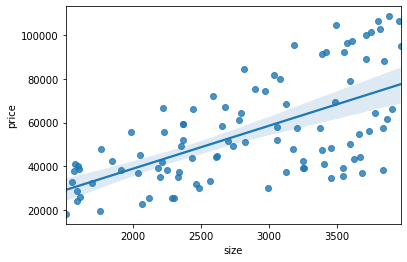

In [9]:
sns.regplot(X,y)

<h1> multi variable </h1>

In [29]:
X= data.iloc[:,0:2]
ones= np.ones([X.shape[0],1])
X= np.concatenate((ones,X),axis=1)
y= data.iloc[:,2:3].values
print(X.shape,y.shape)

(99, 3) (99, 1)


In [30]:
t =  np.dot(X.T,y) 
inv= np.linalg.inv( np.dot(X.T,X))
print(t.shape,inv.shape)
beta = np.dot(inv,t)

(3, 1) (3, 3)


In [31]:
beta

array([[ 760.18467381],
       [  19.69812866],
       [-417.88667645]])

In [32]:
yhat=np.dot(X[2],beta)
yhat

array([78445.37815027])

In [33]:
X[:,2]

array([4., 3., 1., 5., 1., 5., 3., 4., 3., 5., 1., 4., 2., 3., 5., 4., 4.,
       1., 3., 2., 4., 1., 2., 4., 4., 1., 5., 4., 2., 4., 4., 2., 5., 5.,
       4., 1., 2., 2., 5., 5., 3., 4., 4., 2., 5., 1., 1., 4., 3., 1., 2.,
       5., 5., 1., 4., 3., 5., 1., 1., 4., 1., 1., 4., 1., 5., 4., 5., 1.,
       5., 2., 3., 5., 5., 3., 4., 1., 3., 1., 5., 4., 5., 1., 1., 2., 5.,
       4., 3., 5., 4., 5., 5., 3., 1., 4., 2., 3., 1., 4., 2.])

<AxesSubplot:xlabel='size', ylabel='Price'>

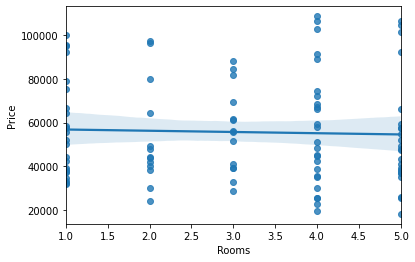

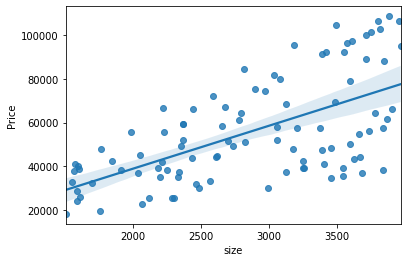

In [34]:
sns.regplot(X[:,2],y)#room
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.figure()
plt.ylabel('Price')
plt.xlabel('size')
sns.regplot(X[:,1],y)#size